In [1]:
from queries import*
from utilities import*

# Imporing distance statistic data

In [4]:
distance_all_cells = pd.read_csv('./data/output/distance_statistics_all_cells.csv')

distance_to_stroma = pd.read_csv('./data/output/distance_statistics_to_stroma.csv')

distance_to_tumor = pd.read_csv('./data/output/distance_statistics_to_tumor.csv')

cell_data = pd.read_csv('./data/cell_data.csv')

cell_degree =pd.read_csv('./data/output/cell_degree.csv')


## Changing column name

In [14]:
distance_all_cells = distance_all_cells.rename(columns = {'cell_id_1' : 'cell_id'})
distance_to_stroma = distance_to_stroma.rename(columns = {'cell_id_1' : 'cell_id'})
distance_to_tumor = distance_to_tumor.rename(columns = {'cell_id_1' : 'cell_id'})
cell_degree = cell_degree.rename(columns = {'cell_id_1' : 'cell_id'})


### Merging all data together

In [19]:
columns_analysis = ['cell_id', 'tissue_category', 'phenotype','cell_x_position', 'cell_y_position']
cell_data_restricted = cell_data[columns_analysis]

In [20]:
cell_features = cell_data_restricted.merge(distance_all_cells, on ='cell_id', how='left')
cell_features = cell_features.merge(distance_to_stroma, on ='cell_id', how='left')
cell_features = cell_features.merge(distance_to_tumor, on ='cell_id', how='left')
cell_features = cell_features.merge(cell_degree, on ='cell_id', how='left')

In [21]:
cell_features.head(3)

,cell_id,tissue_category,phenotype,cell_x_position,cell_y_position,mean_distance,var_distance,max_distance,min_distance,mean_distance_to_stroma,...,CD3p,CD3p_CD56p,CD3p_CD68p,CD56p,CD68p,DAPIp,MISSING,SOX10p,SOX10p_CD56p,SOX10p_CD68p
0,1,stroma,DAPIp,14040.7,37383.4,2385.100792,1.036585e+06,5626.876739,5.758472,2848.288313,...,0.0,0.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,0.0
1,2,stroma,MISSING,14049.6,37381.9,2380.528509,1.032721e+06,5618.610278,4.949747,2843.492477,...,0.0,0.0,0.0,0.0,0.0,29.0,2.0,0.0,0.0,0.0
2,3,stroma,MISSING,14056.5,37381.9,2376.300582,1.030089e+06,5611.918945,6.900000,2839.333393,...,0.0,0.0,0.0,0.0,0.0,31.0,1.0,0.0,0.0,0.0


In [22]:
cell_features.columns

Index(['cell_id', 'tissue_category', 'phenotype', 'cell_x_position',
       'cell_y_position', 'mean_distance', 'var_distance', 'max_distance',
       'min_distance', 'mean_distance_to_stroma', 'var_distance_to_stroma',
       'max_distance_to_stroma', 'min_distance_to_stroma',
       'mean_distance_to_tumor', 'var_distance_to_tumor',
       'max_distance_to_tumor', 'min_distance_to_tumor', 'missing_degree',
       'stroma_degree', 'tumor_degree', 'total_degree', 'CD11Cp',
       'CD11Cp_CD56p', 'CD20p', 'CD20p_CD68p', 'CD3p', 'CD3p_CD56p',
       'CD3p_CD68p', 'CD56p', 'CD68p', 'DAPIp', 'MISSING', 'SOX10p',
       'SOX10p_CD56p', 'SOX10p_CD68p'],
      dtype='object')

## Degree analysis

### Degree distribution

The mean  29.94048131300713
The median 32.0


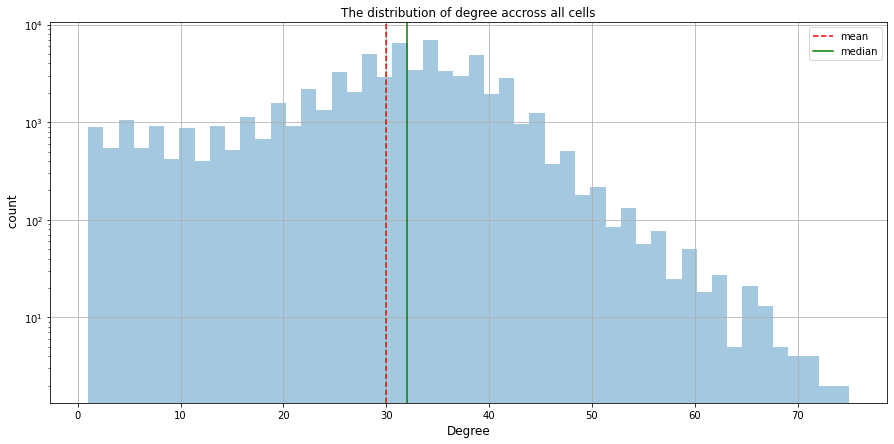

In [24]:

plt.figure(figsize=(15,7))
ax =sns.distplot(cell_features['total_degree'], hist=True, kde=False)
print('The mean ',cell_features['total_degree'].mean())
print('The median',cell_features['total_degree'].median())
ax.axvline(cell_features['total_degree'].mean(), color='r', linestyle='--', label='mean')
ax.axvline(cell_features['total_degree'].median(), color='g', linestyle='-', label='median')
ax.set_yscale('log')
plt.grid()
plt.xlabel('Degree', size='large')
plt.ylabel(' count', size='large')
plt.title('The distribution of degree accross all cells')
plt.legend()
plt.show()

No handles with labels found to put in legend.


The mean  29.94048131300713
The median 32.0


<Figure size 1080x504 with 0 Axes>

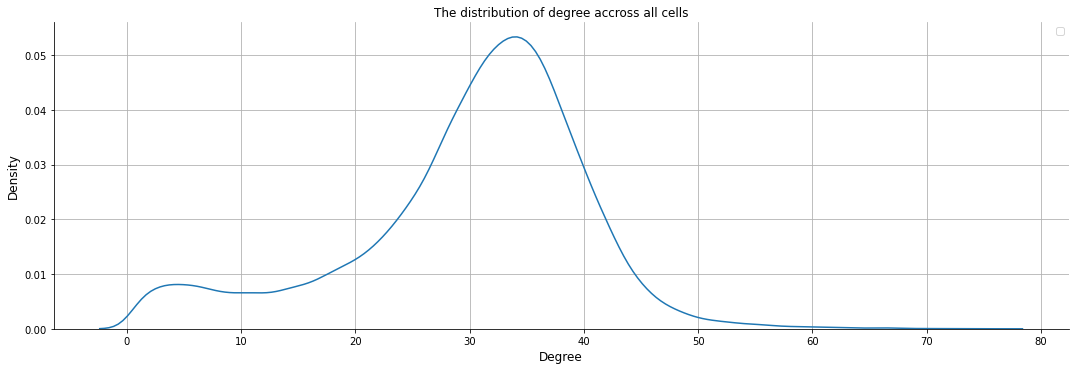

In [38]:
plt.figure(figsize=(15,7))
sns.displot(data = cell_features, x ='total_degree', kind='kde', aspect=3, height=5)
print('The mean ',cell_features['total_degree'].mean())
print('The median',cell_features['total_degree'].median())
#ax.axvline(cell_features['total_degree'].mean(), color='r', linestyle='--', label='mean')
#ax.axvline(cell_features['total_degree'].median(), color='g', linestyle='-', label='median')
#ax.set_yscale('log')
plt.grid()
plt.xlabel('Degree', size='large')
plt.ylabel('Density', size='large')
plt.title('The distribution of degree accross all cells')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


The mean  29.94048131300713
The median 32.0


<Figure size 1080x504 with 0 Axes>

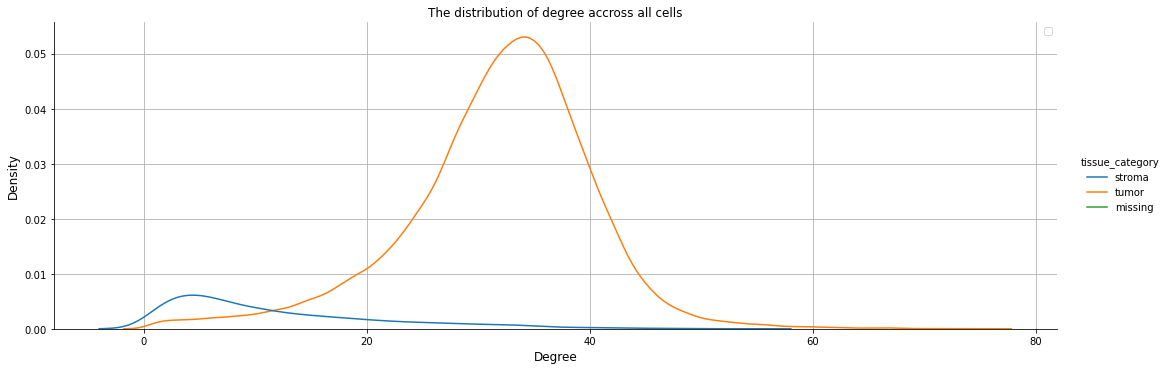

In [39]:
plt.figure(figsize=(15,7))
sns.displot(data = cell_features, x ='total_degree', hue='tissue_category', kind='kde', aspect=3, height=5)
print('The mean ',cell_features['total_degree'].mean())
print('The median',cell_features['total_degree'].median())
#ax.axvline(cell_features['total_degree'].mean(), color='r', linestyle='--', label='mean')
#ax.axvline(cell_features['total_degree'].median(), color='g', linestyle='-', label='median')
#ax.set_yscale('log')
plt.grid()
plt.xlabel('Degree', size='large')
plt.ylabel('Density', size='large')
plt.title('The distribution of degree accross all cells')
plt.legend()
plt.show()

In [47]:
phenotype_columns = ['CD11Cp',
       'CD11Cp_CD56p', 'CD20p', 'CD20p_CD68p', 'CD3p', 'CD3p_CD56p',
       'CD3p_CD68p', 'CD56p', 'CD68p', 'DAPIp', 'MISSING', 'SOX10p',
       'SOX10p_CD56p', 'SOX10p_CD68p']

phenotype_degrees = cell_features[phenotype_columns]
phenotype_degrees.describe()

,CD11Cp,CD11Cp_CD56p,CD20p,CD20p_CD68p,CD3p,CD3p_CD56p,CD3p_CD68p,CD56p,CD68p,DAPIp,MISSING,SOX10p,SOX10p_CD56p,SOX10p_CD68p
count,65072.000000,65072.000000,65072.00000,65072.000000,65072.000000,65072.000000,65072.000000,65072.000000,65072.000000,65072.000000,65072.000000,65072.00000,65072.000000,65072.000000
mean,0.019655,0.000430,0.03699,0.000630,0.254042,0.000307,0.000415,0.008191,0.047716,3.790586,0.369007,25.40804,0.000615,0.003857
std,0.241143,0.020739,0.44459,0.025094,1.433884,0.017529,0.020366,0.092986,0.284823,4.136068,1.060548,11.66683,0.030359,0.069690
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.00000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,28.00000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,33.00000,0.000000,0.000000
max,7.000000,1.000000,13.00000,1.000000,36.000000,1.000000,1.000000,2.000000,6.000000,45.000000,14.000000,67.00000,2.000000,2.000000
